<a href="https://colab.research.google.com/github/pramod1997/submission_data_sciece/blob/master/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix ,roc_curve , auc

In [0]:
df = pd.read_csv('new_processed_data.csv')

In [0]:
### drop columns with target value --> 2 
df.drop(df[df['pymt_standing']==2].index , inplace = True)

In [0]:
feature = [x for x in df.columns if x not in ['pymt_standing']]
Y = df['pymt_standing']
X = df[feature]

In [0]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

In [0]:
param_grid = {
      'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
clf = GridSearchCV(LogisticRegression(penalty = 'l2', solver = 'lbfgs',max_iter =4000) , param_grid ,cv =5 )


In [7]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
clf.best_params_

{'C': 0.01}

In [0]:
model = LogisticRegression(C=0.01, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
model.fit(X_train,Y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [11]:
roc_score = roc_auc_score(Y_test,model.predict_proba(X_test)[:,1])
roc_score

1.0

In [12]:
prediction = model.predict(X_test)
confusion_matrix(Y_test,prediction)

array([[ 63,   0],
       [  0, 301]])

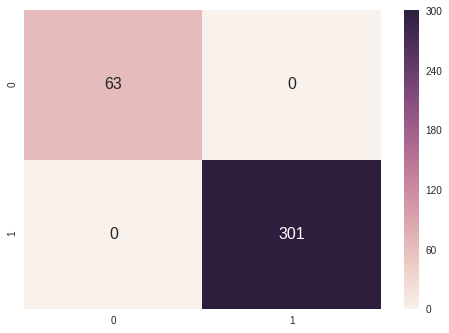

In [13]:
##plotting confusion matrix 
array = confusion_matrix(Y_test,prediction)
df_cm = pd.DataFrame(array, [0,1],
                  [0,1])
#plt.figure(figsize = (10,7))
plt.xlabel('Predicted')
plt.ylabel('Actual Label')
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16} ,fmt='g')# font size

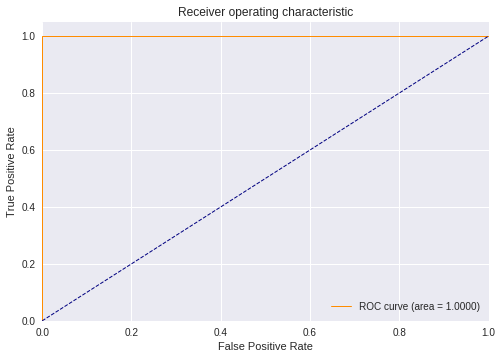

In [14]:
## plot roc curve
###  

target = Y_test
prediction = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve( target,prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()